In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [23]:
df = pd.read_csv("CleanData.csv")
print(df.head())


   cough  fever  sore_throat  shortness_of_breath  head_ache  \
0      1      0            0                    0          0   
1      1      1            0                    0          0   
2      0      0            0                    0          0   
3      0      0            0                    0          0   
4      0      0            0                    0          0   

   age_60_and_above  gender  Abroad  Contact  No_activite  corona_result  
0                 0       1       1        0            0              0  
1                 0       1       0        0            1              0  
2                 0       1       0        0            1              1  
3                 0       1       0        0            1              1  
4                 0       1       0        0            1              1  


In [24]:
print(df.shape)
print(df.info())

(47998, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47998 entries, 0 to 47997
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   cough                47998 non-null  int64
 1   fever                47998 non-null  int64
 2   sore_throat          47998 non-null  int64
 3   shortness_of_breath  47998 non-null  int64
 4   head_ache            47998 non-null  int64
 5   age_60_and_above     47998 non-null  int64
 6   gender               47998 non-null  int64
 7   Abroad               47998 non-null  int64
 8   Contact              47998 non-null  int64
 9   No_activite          47998 non-null  int64
 10  corona_result        47998 non-null  int64
dtypes: int64(11)
memory usage: 4.0 MB
None


In [4]:
print(df.describe())

              cough         fever   sore_throat  shortness_of_breath  \
count  47998.000000  47998.000000  47998.000000         47998.000000   
mean       0.750740      0.386204      0.039397             0.032189   
std        0.432589      0.486883      0.194541             0.176503   
min        0.000000      0.000000      0.000000             0.000000   
25%        1.000000      0.000000      0.000000             0.000000   
50%        1.000000      0.000000      0.000000             0.000000   
75%        1.000000      1.000000      0.000000             0.000000   
max        1.000000      1.000000      1.000000             1.000000   

          head_ache  age_60_and_above        gender        Abroad  \
count  47998.000000      47998.000000  47998.000000  47998.000000   
mean       0.049523          0.107963      0.638068      0.381828   
std        0.216959          0.310337      0.480564      0.485840   
min        0.000000          0.000000      0.000000      0.000000   
25%   

In [25]:
df=df.drop('Abroad',axis=1)
df=df.drop('Contact',axis=1)
df=df.drop('No_activite',axis=1)
df=df.drop('gender',axis=1)

X=df.drop('corona_result',axis=1).values
Y = df['corona_result'].values

print(X.shape)
print(Y.shape)



(47998, 6)
(47998,)


In [6]:
#from sklearn.datasets import make_blobs

#x,y = make_blobs(n_samples=200, centers=2, n_features=3, random_state=0)
#print(x.shape)
#print(y)

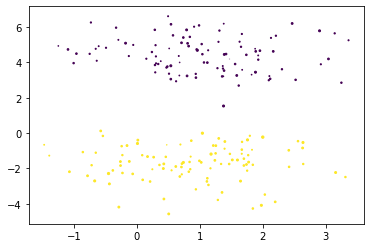

In [36]:
#plt.scatter(x[:,0],x[:,1],x[:,2], c=y)
#plt.show()


In [30]:
#x, y = make_blobs(n_samples=300, centers=2, n_features=3, random_state=0)
#print(x.shape)
#print(y)

#plt.scatter(x[:,0],x[:,1],x[:,2], c=y)
#plt.show()

In [26]:
print(X.shape,Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
test_size=0.3, random_state=42)

#print("done")

(47998, 6) (47998,)


In [11]:
#Model Selection- Linearly Saparable so Model that can be use are : Knn model,Logistic,LinearSVC,SVM 

In [27]:
# SUPPORT VECTOR MACHINE

svm = SVC()  
svm.fit(X_train,Y_train);
print(svm.score(X_train,Y_train))

y_pred = svm.predict(X_test)
print(svm.score(X_test,Y_test))

print(classification_report(Y_test, y_pred))


0.8724626465861063
0.8703472222222223
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     10038
           1       0.89      0.66      0.75      4362

    accuracy                           0.87     14400
   macro avg       0.88      0.81      0.83     14400
weighted avg       0.87      0.87      0.86     14400



In [11]:
print(y_pred)

[0 0 1 ... 0 0 0]


In [12]:
 print(y_pred.shape)

(14400,)


In [ ]:
 # GUI CODE USING TKINTER

In [36]:
# Required GUI Packages 
from tkinter import*
from PIL import ImageTk
from tkinter import messagebox
import math

class Main:
    def __init__(self,root):
        self.root = root
        
        #-----Title of Window------#
        self.root.title("Prediction of Corona Positive")
        
        #-----Setting Size of Window---#
        self.root.geometry("1199x600+100+50")
        
        #----Disable Resize button--#
        self.root.resizable(False,False)
        
        #-----Back-Ground Image----#
        self.bg = PhotoImage(file ="image/bg.png")
        self.bg_image = Label( self.root , image=self.bg )
        self.bg_image.place( x=0 , y=0 , relwidth=1 , relheight=1 ) 
        
        #-----Create Form for Entering Symptom----#
        Frame_sptm = Frame( self.root , bg="white")
        Frame_sptm.place(x=270 , y=60 , height=400 , width=700)
        
        #---Create Label----#
        title = Label(Frame_sptm , text="-Corona Prediction Tool-" , font =("Calibri",35,"bold") , bg = "#154e7d" , fg = "white")
        title.place(x=120,y=30)
        
        title_n = Label(Frame_sptm , text="Answer Y/N" , font =("Calibri",13 ) , bg="white", fg = "black")   #Yes/No
        title_n.place(x=320,y=100)
        
        title_1 = Label(Frame_sptm , text="Fever?" , font =("Calibri",15,"bold") , bg="white", fg = "#154e7d")
        title_1.place(x=40,y=140)
        #----Textbox---#
        self.text_1 = Entry(Frame_sptm, font=("Calibri",14), bg="#f6fafd")
        self.text_1.place(x=180,y=140,width=100,height=30)
        
        title_2 = Label(Frame_sptm , text="Cough?" , font =("Calibri",15,"bold") , bg="white", fg = "#154e7d")
        title_2.place(x=40,y=200)
        #----Textbox---#
        self.text_2 = Entry(Frame_sptm, font=("Calibri",14), bg="#f6fafd")
        self.text_2.place(x=180,y=200,width=100,height=30)
        
        title_3 = Label(Frame_sptm , text="Sore Throat?" , font =("Calibri",15,"bold") , bg="white", fg = "#154e7d")
        title_3.place(x=40,y=260)
        #----Textbox---#
        self.text_3 = Entry(Frame_sptm, font=("Calibri",14), bg="#f6fafd")
        self.text_3.place(x=180,y=260,width=100,height=30)
        
        
        
        title_4 = Label(Frame_sptm , text="Shortness of breath?" , font =("Calibri",15,"bold") , bg="white", fg = "#154e7d")
        title_4.place(x=340,y=140)
        #----Textbox---#
        self.text_4 = Entry(Frame_sptm, font=("Calibri",14), bg="#f6fafd")
        self.text_4.place(x=550,y=140,width=100,height=30)
        
        title_5 = Label(Frame_sptm , text="Headache?" , font =("Calibri",15,"bold") , bg="white", fg = "#154e7d")
        title_5.place(x=340,y=200)
        #----Textbox---#
        self.text_5 = Entry(Frame_sptm, font=("Calibri",14), bg="#f6fafd")
        self.text_5.place(x=550,y=200,width=100,height=30)
        
        title_6 = Label(Frame_sptm , text="Age more than 60?" , font =("Calibri",15,"bold") , bg="white", fg = "#154e7d")
        title_6.place(x=340,y=260)
        #----Textbox---#
        self.text_6 = Entry(Frame_sptm, font=("Calibri",14), bg="#f6fafd")
        self.text_6.place(x=550,y=260,width=100,height=30)
        
       
        btn = Button(self.root, command= self.main_function, text= "Predict",bg = "#154e7d", fg = "white", font=("Calibri",20))
        btn.place(x=520,y=390,width=170,height=40)
        
    def main_function(self):
        
         
        if self.text_1.get()=='Y'or self.text_1.get()=='y':
            self.a=1
        else:
            self.a=0
        
        if self.text_2.get()=='Y'or self.text_2.get()=='y':
            self.b=1
        else:
            self.b=0
         
        if self.text_3.get()=='Y'or self.text_3.get()=='y':
            self.c=1
        else:
            self.c=0
            
      
        if self.text_4.get()=='Y'or self.text_4.get()=='y':
            self.d=1
        else:
            self.d=0
        
        
        if self.text_5.get()=='Y'or self.text_5.get()=='y':
            self.e=1
        else:
            self.e=0
        
        if self.text_6.get()=='Y'or self.text_6.get()=='y':
            self.f=1
        else:
            self.f=0
        
        
        Xnew = [[self.a,self.b,self.c,self.d,self.e,self.f]]
    
            
        
        #-----if textboxs are empty----#
        if self.text_1.get()==" " or self.text_2.get()=="" or self.text_3.get()=="" or self.text_4.get()==" " or self.text_5.get()=="" or self.text_6.get()=="":
            messagebox.showerror("Error", "All fields are required",parent=self.root)
        
        #----if textboxs arenon-empty----#
        else:
            if self.text_1.get()=='Y' or self.text_1.get()=='y' or self.text_1.get()=='N' or self.text_1.get()=='n':
                
                if self.text_2.get()=='Y' or self.text_2.get()=='y' or self.text_2.get()=='N' or self.text_2.get()=='n':
                    
                    if self.text_3.get()=='Y' or self.text_3.get()=='y' or self.text_3.get()=='N' or self.text_3.get()=='n':
                        
                        if self.text_4.get()=='Y' or self.text_4.get()=='y' or self.text_4.get()=='N' or self.text_4.get()=='n':
                            
                            if self.text_5.get()=='Y' or self.text_5.get()=='y' or self.text_5.get()=='N' or self.text_5.get()=='n':
                                
                                if self.text_6.get()=='Y' or self.text_6.get()=='y' or self.text_6.get()=='N' or self.text_6.get()=='n':
                                    
                                    result = svm.predict(Xnew)
                                    
                                    messagebox.showinfo("Predicted Result",f"Predicted Result of Covid 19\n {result}",parent=self.root)
                    else:
                        messagebox.showerror("Error", "Please Enter Y or N",parent=self.root) 
                else:  
                    messagebox.showerror("Error", "Please Enter Y or N",parent=self.root)
            else:
                messagebox.showerror("Error", "Please Enter Y or N",parent=self.root)
                
        
root = Tk()
obj = Main(root)
root.mainloop()        

